# 🌾 PRCP-1001 – Rice Leaf Disease Detection

### Capstone Project  
**Objective:** Classification of rice leaf diseases using Deep Learning

## 🎯 Objectives

- Perform Exploratory Data Analysis (EDA) on the rice leaf dataset  
- Build a CNN-based classification model  
- Apply Transfer Learning using MobileNetV2  
- Analyze the impact of Data Augmentation  
- Compare multiple models  
- Develop a Streamlit frontend  

In [ ]:
!pip install tensorflow

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models

## 📂 Dataset Description

The dataset contains rice leaf images categorized into **three disease classes**:

| Class | Description |
|-------|-------------|
| Leaf smut | Fungal infection causing dark powdery spots |
| Brown spot | Circular brown lesions on leaves |
| Bacterial leaf blight | Yellowing and drying due to bacteria |

Class distribution:

- Leaf smut → 39 images  
- Brown spot → 40 images  
- Bacterial leaf blight → 40 images  

The dataset is **nearly balanced**, with a slight class imbalance.

## 📐 Dataset Shape

After loading:

- `X` → Image data  
- `y` → Numeric labels  

We verify dimensions to ensure correct preprocessing.

In [2]:
data_dir = "Data"

classes = ["Leaf smut", "Brown spot", "Bacterial leaf blight"]

images = []
labels = []

for label, disease in enumerate(classes):
    path = os.path.join(data_dir, disease)

    for img in os.listdir(path):
        img_path = os.path.join(path, img)

        image = cv2.imread(img_path)
        image = cv2.resize(image, (224, 224))  # ✅ FIXED

        images.append(image)   
        labels.append(label)  

X = np.array(images)
y = np.array(labels)

In [3]:
X

array([[[[223, 230, 239],
         [222, 228, 239],
         [223, 230, 239],
         ...,
         [208, 220, 239],
         [223, 232, 241],
         [225, 232, 241]],

        [[224, 230, 239],
         [223, 229, 240],
         [224, 228, 239],
         ...,
         [221, 229, 243],
         [225, 232, 241],
         [224, 231, 240]],

        [[225, 231, 240],
         [223, 229, 240],
         [224, 228, 239],
         ...,
         [225, 232, 241],
         [227, 233, 242],
         [225, 231, 240]],

        ...,

        [[226, 232, 239],
         [224, 231, 240],
         [226, 230, 241],
         ...,
         [223, 228, 239],
         [222, 228, 239],
         [224, 231, 240]],

        [[225, 231, 238],
         [226, 231, 240],
         [226, 231, 240],
         ...,
         [224, 231, 240],
         [222, 228, 239],
         [223, 230, 239]],

        [[224, 229, 239],
         [226, 231, 240],
         [226, 232, 239],
         ...,
         [225, 233, 240],
        

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
print("Total Images:", len(X))

Total Images: 119


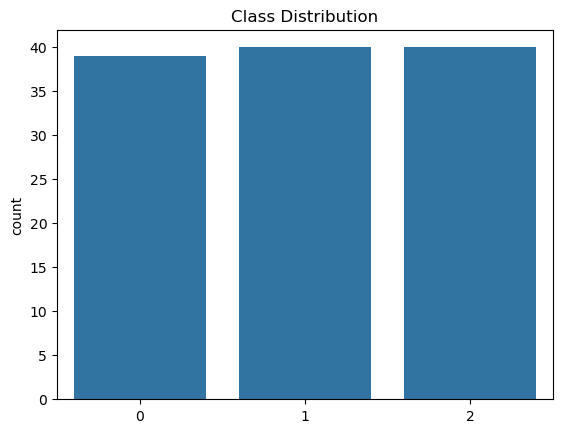

In [6]:
sns.countplot(x=y)
plt.title("Class Distribution")
plt.show()

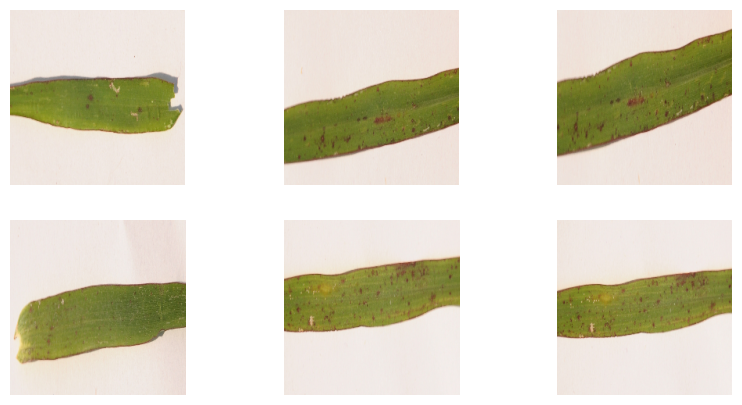

In [7]:
plt.figure(figsize=(10,5))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(cv2.cvtColor(X[i], cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.show()

In [8]:
print("Image Shape:", X[0].shape)

Image Shape: (224, 224, 3)


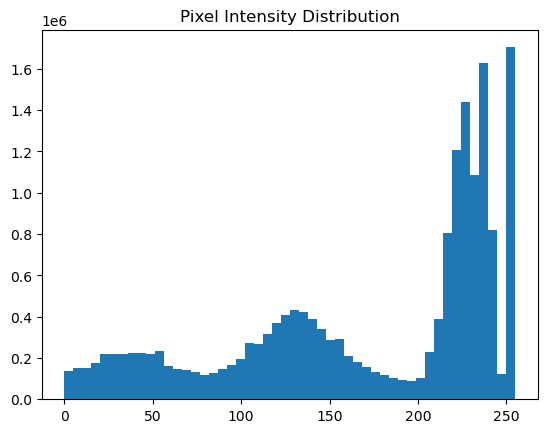

In [9]:
plt.hist(X.ravel(), bins=50)
plt.title("Pixel Intensity Distribution")
plt.show()

In [10]:
X = X / 255

X_train , X_test , y_train , y_test = train_test_split(
    X , y , test_size = 0.2 , random_state = 42
)

## 🧠 Model 1 – Convolutional Neural Network (CNN)

A CNN is built from scratch consisting of:

- Convolution layers → Feature extraction  
- Pooling layers → Downsampling  
- Dense layers → Classification  

CNNs are effective for image-based tasks.

In [17]:
cnn_model = models.Sequential([
    layers.Conv2D(32 , (3,3) , activation = 'relu' , input_shape = (224 , 224 , 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64 , (3,3) , activation = 'relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128 , activation = 'relu') , 
    layers.Dense(3 ,activation = 'softmax')
])


## ⚙️ Model Compilation

The model is compiled by defining:
|
- **Optimizer:** Adam  
- **Loss Function:** Sparse Categorical Crossentropy  
- **Metric:** Accuracy  

Compilation configures the learning process.

In [18]:
cnn_model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    
)

In [19]:
history = cnn_model.fit(
    X_train , y_train , 
    epochs = 10 , 
    validation_split = 0.2
)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.2763 - loss: 22.4788 - val_accuracy: 0.2105 - val_loss: 8.1394
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 681ms/step - accuracy: 0.3553 - loss: 7.3831 - val_accuracy: 0.6316 - val_loss: 3.9718
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 622ms/step - accuracy: 0.4342 - loss: 3.9944 - val_accuracy: 0.2632 - val_loss: 1.5792
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 637ms/step - accuracy: 0.5789 - loss: 1.1450 - val_accuracy: 0.2632 - val_loss: 1.1540
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 633ms/step - accuracy: 0.4868 - loss: 0.9552 - val_accuracy: 0.2105 - val_loss: 1.1542
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 628ms/step - accuracy: 0.4079 - loss: 0.9227 - val_accuracy: 0.5789 - val_loss: 0.9363
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 663ms/step - accuracy: 0.6447 - loss: 0.8454 - val_accuracy: 0.6316 - val_loss: 0.7761
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 636ms/step - accuracy: 0.6579 - loss: 0.7655 - val_accuracy: 0.1579 - val_loss: 1

## 🔁 Model 2 – Transfer Learning (MobileNetV2)

Instead of training from scratch, we use **MobileNetV2**, a pretrained CNN.

Benefits:

- Faster training  
- Better feature extraction  
- Reduced overfitting  
- Ideal for small datasets  

In [20]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False

transfer_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')
])

transfer_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_tl = transfer_model.fit(X_train, y_train, epochs=10, validation_split=0.2)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step 
Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.4342 - loss: 1.2488 - val_accuracy: 0.7895 - val_loss: 0.4678
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 714ms/step - accuracy: 0.7763 - loss: 0.5893 - val_accuracy: 0.9474 - val_loss: 0.3772
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 682ms/step - accuracy: 0.8684 - loss: 0.3109 - val_accuracy: 0.8947 - val_loss: 0.2621
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 619ms/step - accuracy: 0.9737 - loss: 0.1547 - val_accuracy: 0.9474 - val_loss: 0.1577
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 642ms/step - accuracy: 0.9868 - loss: 0.0819 - val_accuracy: 1.0000 - val_loss: 0.1075
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 618ms/step - accuracy: 0.9868 - loss: 0.0607 - val_accuracy: 1.0000 - val_loss: 0.0915
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 626ms/step - accuracy: 0.9868 - loss: 0.0397 - val_accuracy: 0.9474 - val_loss: 0.1064
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 673ms/step - accuracy: 1.0000 -

## 📊 Model Evaluation

Model performance is evaluated using:

- Accuracy  
- Precision  
- Recall  
- F1-score  
- Confusion Matrix  

In [21]:
preds = np.argmax(transfer_model.predict(X_test), axis=1)

print(classification_report(y_test, preds))

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
              precision    recall  f1-score   support

           0       0.64      1.00      0.78         7
           1       1.00      0.62      0.77         8
           2       1.00      0.89      0.94         9

    accuracy                           0.83        24
   macro avg       0.88      0.84      0.83        24
weighted avg       0.89      0.83      0.84        24



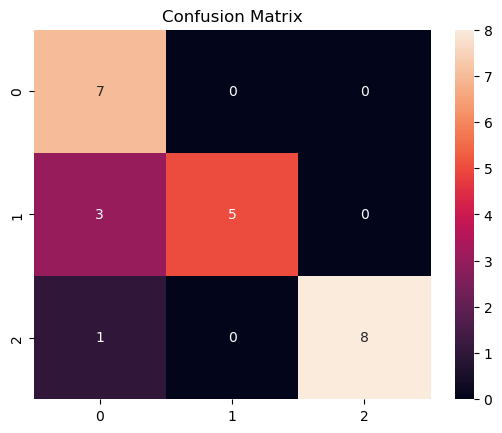

In [22]:
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [23]:
transfer_model.save("rice_leaf_model.h5")

## 📊 Model Evaluation

Model performance is evaluated using:

- Accuracy  
- Precision  
- Recall  
- F1-score  
- Confusion Matrix  